In [2]:
# import modules
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy.ma as ma
import numpy as np
%matplotlib inline

In [3]:
# Import d'un fichier U

path = '/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-MJM155-S/1d/2007/NATL60LAB-MJM155_y2007m12d30'
Ufile = path + '.1d_gridU.nc'

In [103]:
# creation du tableau 1d

from netCDF4 import Dataset
g = Dataset(Ufile, "r", format="NETCDF4")
u = [0]*300
i=0
for i in range(300):
    u[i] = g.variables['vozocrtx'][0,i,150,150]  # niveau de 0 à 299
    
    
    
len (u)
# liste de scalaires
# U est ok

U = np.array(u)

/home/barboty/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


In [107]:
# Liste des niveaux de profondeur - centre/centre

Prof = '/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-I/NATL60LAB_v4.1_cdf_mesh_zgr.nc'

h = Dataset(Prof, "r", format = "NETCDF4")
p = [0]*300
i=0

for i in range(300):
    
    p[i] = h.variables['e3w'][0,i,150,150]
    
len(p)
P = np.array(p)

In [109]:
# Liste des niveaux de profondeur - cellule/cellule

Prof = '/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-I/NATL60LAB_v4.1_cdf_mesh_zgr.nc'

f = Dataset(Prof, "r", format = "NETCDF4")
q = [0]*300
i=0

for i in range(300):
    
    q[i] = f.variables['e3t'][0,i,150,150]
    
len(q)
Q = np.array(q)

In [53]:
# Création des niveaux de profondeur - Avec les niveaux cellule/cellule

Depth = [0]*300
i=0
for i in range(300):
    if (i == 0):
        Depth[0] = Q[0]
    else:
        Depth[i] = Depth[i-1]+Q[i]

len(Depth)


300

In [104]:
DEPTH = np.array(Depth)



(3000, 0)

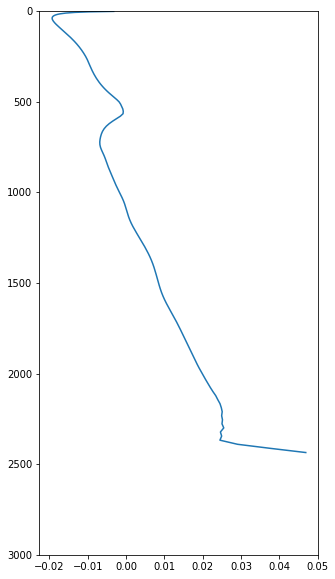

In [106]:
fig = plt.figure(figsize=(5, 10))  # (w,h)

ax = plt.subplot(111)
ax.plot(U,DEPTH)
ax.set_ylim(3000, 0)